In [1]:
# Examining base model data.

Number of training samples: 641123
Number of validation samples: 50000
Number of test samples: 640044


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample image shape: torch.Size([3, 224, 224])


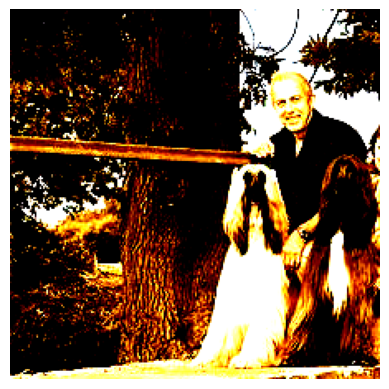

In [64]:
from data_utils import CustomDataModule

datamodule = CustomDataModule(
        dataset_name="imagenet-1k/0_16",
        num_workers=16,
        image_size=224,
        batch_size=16,
        data_root="../image_QMIA_v3/data/",
        stage="base",
)

datamodule.setup()

print(f"Number of training samples: {len(datamodule.train_dataset)}")
print(f"Number of validation samples: {len(datamodule.val_dataset)}")
print(f"Number of test samples: {len(datamodule.test_dataset)}")

sample_img = datamodule.train_dataset[2][0]
print(f"Sample image shape: {sample_img.shape}")

import PIL
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image):
    image = image.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

show_image(sample_img)

Number of training samples: 640044
Number of validation samples: 50000
Number of test samples: 641123


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample image shape: torch.Size([3, 224, 224])


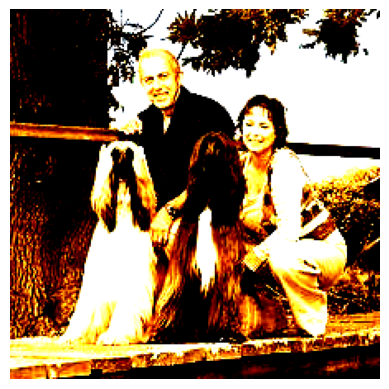

In [65]:
from data_utils import CustomDataModule

datamodule = CustomDataModule(
        dataset_name="imagenet-1k/0_16",
        num_workers=16,
        image_size=224,
        batch_size=16,
        data_root="../image_QMIA_v3/data/",
        stage="eval",
)

datamodule.setup()

print(f"Number of training samples: {len(datamodule.train_dataset)}")
print(f"Number of validation samples: {len(datamodule.val_dataset)}")
print(f"Number of test samples: {len(datamodule.test_dataset)}")

sample_img = datamodule.test_dataset[2][0]
print(f"Sample image shape: {sample_img.shape}")

import PIL
from PIL import Image
import matplotlib.pyplot as plt

def show_image(image):
    image = image.permute(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

show_image(sample_img)

In [66]:
# Examining the predictions before aggregation step.

import torch

predictions0 = torch.load("/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian/cls_drop_none/predictions/predictions_0.pt")

In [67]:
accuracy = 0
for i in range(len(predictions0[0])):
    logits = predictions0[0][i][2]
    targets = predictions0[0][i][3]
    accuracy += (logits.argmax(dim=1) == targets).float().mean()
accuracy /= len(predictions0[0])
print(f"Accuracy: {accuracy.item() * 100:.2f}%")

Accuracy: 32.39%


In [41]:
# checking aggregation step

test = torch.load("/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian/cls_drop_none/predictions/predictions_test.pt")
zero = torch.load("/work3/nkale/ml-projects/classification-quantile-mia/image_QMIA_v2/models/mia/base_imagenet-1k/0_16/resnet-50/attack_imagenet-1k/0_16/facebook/convnext-tiny-224/score_fn_top_two_margin/loss_fn_gaussian/cls_drop_none/predictions/predictions_0.pt")